# Attempt to solve Fashion MNIST Dataset using Dense Neural Network
## Bibliography
* Keras official Tutorial
* Deep Learning with Python by François Chollet

## About DataSet
**Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import layers, models
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import os
from tensorflow.keras.datasets import fashion_mnist

# Load Dataset and Split it to test and train set

see this link
https://medium.com/the-data-science-publication/how-to-import-and-display-the-fashion-mnist-dataset-using-tensorflow-e72522f684d0

In [ ]:
#Getting training and testing data from tensorflow


28*28 image pixels

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
# هذا السطر يقوم بعملية تطبيع قيم البيكسل (Normalization) لصور التدريب والاختبار، وهي خطوة مهمة جدًا قبل تدريب معظم نماذج التعلم الآلي أو الشبكات العصبية.

# X_train و X_test هما مصفوفات تحتوي على صور.

# كل صورة مخزنة كقيم بكسل رقمية تتراوح بين 0 و 255 (قيم 8-بت لكل بكسل).

# القسمة على 255.0 تحول كل قيمة بكسل إلى قيمة بين 0 و 1.

# هذا يجعل البيانات أكثر توافقًا مع النماذج الحديثة التي تعمل بشكل أفضل مع قيم مدخلة مقيّدة في هذا النطاق.

# لماذا نطبّع البيانات؟
# لتسريع عملية التدريب.

# لمنع مشكلة تباين القيم الكبيرة التي قد تؤدي لصعوبات في التعلّم.

# بعض خوارزميات التعلم الآلي تعمل بشكل أفضل عندما تكون البيانات مقيّدة داخل نطاق معين.

In [ ]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
#Training Set shape
print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (60000, 28, 28) (60000,)


In [ ]:
print("Test set shape:", X_test.shape, y_test.shape)

Test set shape: (10000, 28, 28) (10000,)


In [ ]:
#Test Set consists of 10000 samples with one label field and 28*28 image pixels


In [ ]:
#Labels from 0 to 9 are following Items
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Split training data to train and valid

In [ ]:
# from sklearn.model_selection import train_test_split

# # Split training data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print shapes of training, validation, and testing data
print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation images shape:", X_valid.shape)
print("Validation labels shape:", y_valid.shape)
print("Testing images shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training images shape: (48000, 28, 28)
Training labels shape: (48000,)
Validation images shape: (12000, 28, 28)
Validation labels shape: (12000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


## Some images with their labels

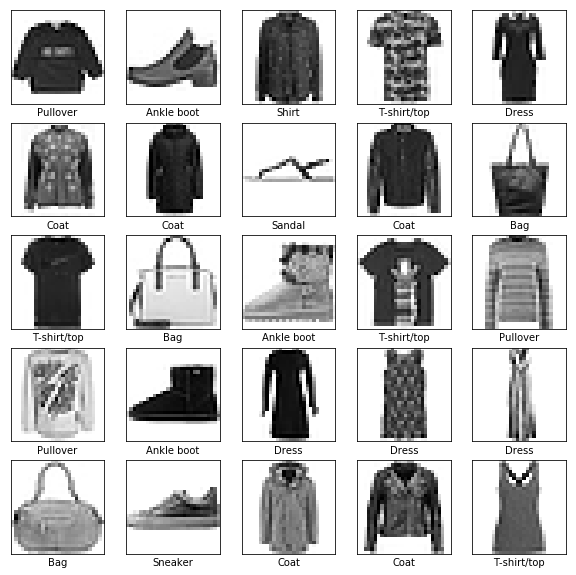

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(X.iloc[i]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y[i]])
plt.show()

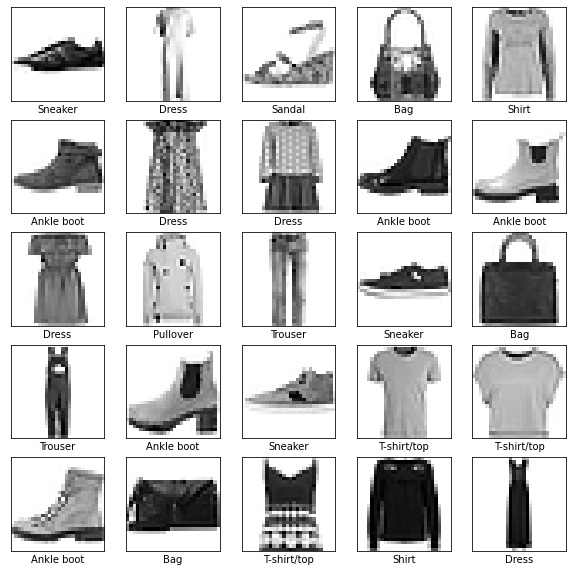

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.array(X_train[i]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
# Rescaling training to range 0 to 1 by dividing them by 255

In [ ]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
# # يقوم بـ إعادة تشكيل بيانات الصور (reshape) لتكون جاهزة للاستخدام مع النماذج التي تتطلب مدخلات في شكل صفوف من الخصائص (features)، وليس كمصفوفات 2D.
# X_train و X_test يحتويان على صور MNIST الأصلية، والتي تكون بشكل:
# (عدد الصور, 28, 28)
# الهدف:
# تحويل كل صورة من شكل مصفوفة (28×28) إلى متجه (784 عنصر)
# X_train_flat: (عدد الصور, 784)
# X_test_flat: (عدد الصور, 784)
# بعض نماذج التعلم الآلي مثل:

# SGDClassifier

# LogisticRegression

# RandomForestClassifier

# تتوقع أن تكون كل عينة إدخال عبارة عن متجه (1D)، وليس صورة 2D.

# لذلك، قبل تدريب هذه النماذج، يجب تحويل كل صورة 28×28 إلى صف من 784 عنصر.

# إذا كنت تستخدم شبكات عصبية تلافيفية (CNN)، فلا تقم بهذا التحويل! لأن CNN تستفيد من البنية ثنائية الأبعاد للصور.

# في حالة النماذج التقليدية (مثل SGDClassifier) هذا التحويل ضروري.

In [ ]:
# Reshape input data
X_train_flat = X_train.reshape((X_train.shape[0], 28 * 28))
X_test_flat = X_test.reshape((X_test.shape[0], 28 * 28))

In [ ]:
# يقوم بتحويل التصنيفات الرقمية (labels) إلى شكل تصنيف متعدد الفئات (One-Hot Encoding)، وهو الشكل المناسب لمعظم نماذج الشبكات العصبية عند استخدام categorical_crossentropy كدالة خسارة.
# ما هو to_categorical؟
# الدالة to_categorical() تقوم بتحويل كل تصنيف رقمي (مثل 3 أو 7) إلى متجه يحتوي على 1 في موضع الرقم، و0 في الباقي.
# y_train = [0, 2, 1]
# فبعد to_categorical يصبح:
# y_train_categorical = [
#   [1, 0, 0],   # الرقم 0
#   [0, 0, 1],   # الرقم 2
#   [0, 1, 0]    # الرقم 1
# ]
# في حالة بيانات MNIST (تصنيف أرقام من 0 إلى 9)، كل تصنيف يتحول إلى متجه طوله 10.

# 📌 لماذا هذا مهم؟
# الشبكات العصبية (مثل Sequential في Keras) التي تستخدم دالة الخسارة categorical_crossentropy تتطلب أن تكون التصنيفات على شكل One-Hot.

# هذا الشكل يُستخدم عند وجود أكثر من فئة (multiclass classification).

# 📝 ملاحظات:
# إذا كنت تستخدم sparse_categorical_crossentropy بدلاً من categorical_crossentropy، فلا تحتاج إلى to_categorical() لأن sparse_categorical_crossentropy يقبل التصنيفات كأرقام صحيحة مباشرة.

In [ ]:
# Convert labels to categorical format
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_valid_categorical = to_categorical(y_valid)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the training data into two parts: training and validation
X_train_partial, X_valid, y_train_partial, y_valid = train_test_split(X_train, y_train_categorical, test_size=0.2, random_state=42)

**Creating a Deep Neural Network with any number of layer you want.**

In [ ]:
# Define the model
# model = models.Sequential()
# model.add(layers.Dense(128,activation='relu',input_shape=(784,)))
# model.add(layers.Dense(10,activation='softmax'))

In [ ]:
# Define the model
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten layer to reshape input
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
# ])

In [ ]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten layer to reshape input
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),  # Dropout layer with dropout rate of 0.25
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

**Compiling the model.**

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
              metrics=['accuracy'])

**Training model with a part of training data and evaluating it with another part of training data
and get more than 90% val_acc**

In [ ]:
# Train the model with 48,000 samples
print("Training on {} samples, validating on {} samples".format(X_train_partial.shape[0], X_valid.shape[0]))
history = model.fit(X_train_partial, y_train_partial, epochs=15, batch_size=128, validation_data=(X_valid, y_valid))

Training on 38400 samples, validating on 9600 samples
Epoch 1/15
300/300 [==============================] - 9s 29ms/step - loss: 1.4665 - accuracy: 0.4318 - val_loss: 0.8712 - val_accuracy: 0.6949
Epoch 2/15
300/300 [==============================] - 4s 15ms/step - loss: 0.8548 - accuracy: 0.6808 - val_loss: 0.7216 - val_accuracy: 0.7411
Epoch 3/15
300/300 [==============================] - 5s 15ms/step - loss: 0.7371 - accuracy: 0.7326 - val_loss: 0.6318 - val_accuracy: 0.7731
Epoch 4/15
300/300 [==============================] - 4s 15ms/step - loss: 0.6697 - accuracy: 0.7557 - val_loss: 0.5836 - val_accuracy: 0.7933
Epoch 5/15
300/300 [==============================] - 4s 14ms/step - loss: 0.6216 - accuracy: 0.7743 - val_loss: 0.5465 - val_accuracy: 0.8092
Epoch 6/15
300/300 [==============================] - 5s 16ms/step - loss: 0.5861 - accuracy: 0.7899 - val_loss: 0.5272 - val_accuracy: 0.8151
Epoch 7/15
300/300 [==============================] - 6s 20ms/step - loss: 0.5583 - accu

In [ ]:
# Evaluate the model on the remaining training data (12,000 samples)
evaluation = model.evaluate(X_valid, y_valid)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

300/300 [==============================] - 2s 7ms/step - loss: 0.4215 - accuracy: 0.8496
Validation Loss: 0.4214584231376648
Validation Accuracy: 0.8495833277702332


In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test_categorical)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.4594 - accuracy: 0.8318
Test accuracy: 0.8317999839782715


In [ ]:
# Train the model with 48,000 samples
print("Training on {} samples, validating on {} samples".format(X_train_partial.shape[0], X_valid.shape[0]))
history = model.fit(X_train_partial, y_train_partial, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

Training on 38400 samples, validating on 9600 samples
Epoch 1/50
300/300 [==============================] - 5s 16ms/step - loss: 0.2013 - accuracy: 0.9265 - val_loss: 0.3443 - val_accuracy: 0.8889
Epoch 2/50
300/300 [==============================] - 4s 14ms/step - loss: 0.2042 - accuracy: 0.9260 - val_loss: 0.3245 - val_accuracy: 0.8896
Epoch 3/50
300/300 [==============================] - 4s 15ms/step - loss: 0.2022 - accuracy: 0.9263 - val_loss: 0.3379 - val_accuracy: 0.8913
Epoch 4/50
300/300 [==============================] - 4s 14ms/step - loss: 0.2016 - accuracy: 0.9272 - val_loss: 0.3446 - val_accuracy: 0.8884
Epoch 5/50
300/300 [==============================] - 4s 14ms/step - loss: 0.2026 - accuracy: 0.9261 - val_loss: 0.3450 - val_accuracy: 0.8891
Epoch 6/50
300/300 [==============================] - 4s 14ms/step - loss: 0.2003 - accuracy: 0.9272 - val_loss: 0.3245 - val_accuracy: 0.8933
Epoch 7/50
300/300 [==============================] - 4s 14ms/step - loss: 0.2006 - accu

In [ ]:
# Evaluate the model on the remaining training data (12,000 samples)
evaluation = model.evaluate(X_valid, y_valid)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

300/300 [==============================] - 2s 7ms/step - loss: 0.4051 - accuracy: 0.8828
Validation Loss: 0.4050631523132324
Validation Accuracy: 0.8828125


In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test_categorical)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.4563 - accuracy: 0.8699
Test accuracy: 0.8698999881744385


Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 5s 100us/step - loss: 0.5821 - acc: 0.7966 - val_loss: 0.4588 - val_acc: 0.8320
Epoch 2/15
48000/48000 [==============================] - 4s 92us/step - loss: 0.4076 - acc: 0.8551 - val_loss: 0.4142 - val_acc: 0.8574
Epoch 3/15
48000/48000 [==============================] - 4s 91us/step - loss: 0.3687 - acc: 0.8661 - val_loss: 0.3836 - val_acc: 0.8628
Epoch 4/15
48000/48000 [==============================] - 4s 91us/step - loss: 0.3385 - acc: 0.8761 - val_loss: 0.3540 - val_acc: 0.8743
Epoch 5/15
48000/48000 [==============================] - 4s 93us/step - loss: 0.3188 - acc: 0.8843 - val_loss: 0.3412 - val_acc: 0.8793
Epoch 6/15
48000/48000 [==============================] - 4s 93us/step - loss: 0.3038 - acc: 0.8898 - val_loss: 0.3279 - val_acc: 0.8839
Epoch 7/15
48000/48000 [==============================] - 4s 91us/step - loss: 0.2913 - acc: 0.8915 - val_loss: 0.3470 - val_ac

# Visualize Model Training History in Keras

See this link
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

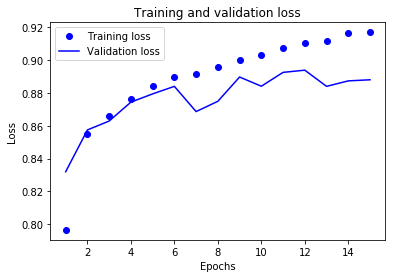

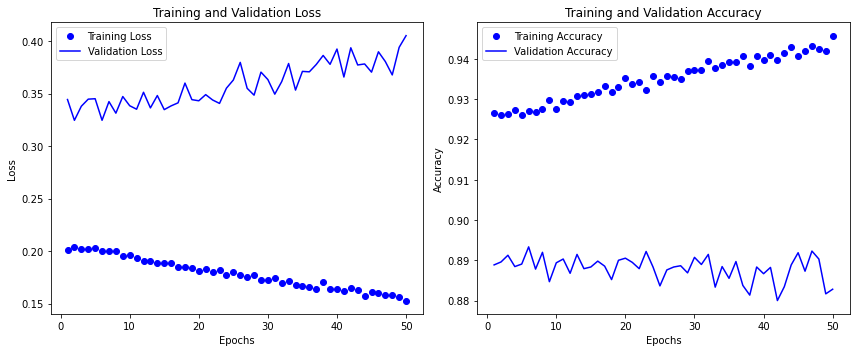

In [ ]:
import matplotlib.pyplot as plt

# Get training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model with our Test Set Using confusion_matrix

-split data to X_test and Y_test
-Rescaling training to range 0 to 1 by dividing them by 255

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

visualization

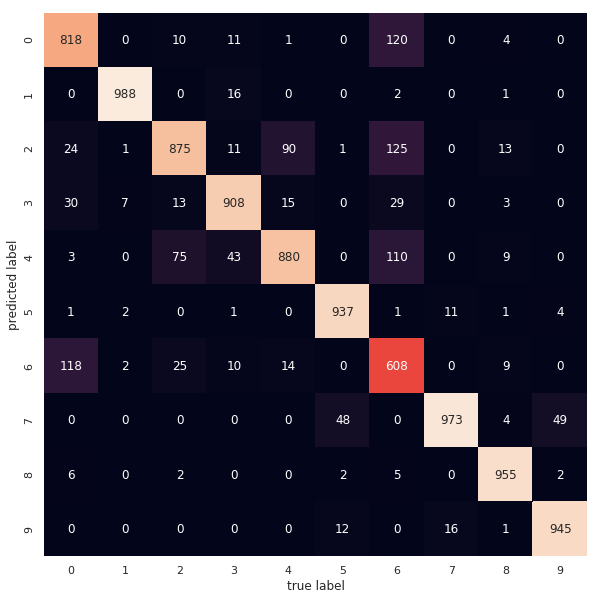

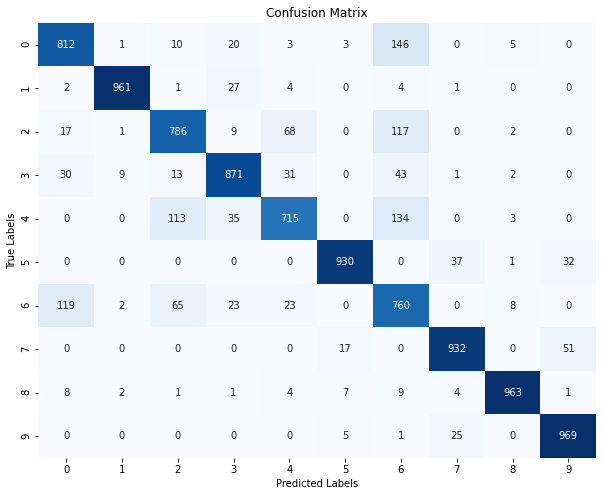

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predicted labels
predicted_labels = np.argmax(model.predict(X_test), axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Find classification_report for the prediction

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       964
           1       0.99      0.98      0.98      1007
           2       0.88      0.77      0.82      1140
           3       0.91      0.90      0.91      1005
           4       0.88      0.79      0.83      1120
           5       0.94      0.98      0.96       958
           6       0.61      0.77      0.68       786
           7       0.97      0.91      0.94      1074
           8       0.95      0.98      0.97       972
           9       0.94      0.97      0.96       974

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
from sklearn.metrics import classification_report

# Get predicted labels
predicted_labels = np.argmax(model.predict(X_test), axis=1)

# Generate classification report
report = classification_report(y_test, predicted_labels)

# Print the report
print(report)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.79      0.79      0.79      1000
           3       0.88      0.87      0.88      1000
           4       0.84      0.71      0.77      1000
           5       0.97      0.93      0.95      1000
           6       0.63      0.76      0.69      1000
           7       0.93      0.93      0.93      1000
           8       0.98      0.96      0.97      1000
           9       0.92      0.97      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



Use model.evaluate the test data

10000/10000 [==============================] - 0s 33us/step
0.3251454734802246 0.8887


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)

# Print the test loss and accuracy
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.4563 - accuracy: 0.8699
Test Loss: 0.4563063085079193
Test Accuracy: 0.8698999881744385
